In [1]:
import numpy
import matplotlib.pyplot as plt

# the effects of model misfit on model training

In [2]:
# QUADRATIC SAMPLE POINTS
def quadratic_generator(point_number=100, alpha=1, beta=1, bias=0):
    x = numpy.random.randint(-100, 100, point_number)
    y = []
    for xi in x:
        y.append(alpha*xi**2+beta*xi+bias)
    return x, y

In [3]:
# UPDATE THE VALUE OF W AND BIAS
def update(x, y, w, b, eta):
    ud_w = 0
    ud_b = 0
    for i in range(len(x)):
        ud_w += x[i]*(y[i]-w*x[i]-b)/len(x)
        ud_b += (y[i]-w*x[i]-b)/len(x)
    return w+eta*ud_w, b+eta*ud_b

def loss(y, pred):
    loss = 0
    for i in range(len(y)):
        loss += (y[i]-pred[i])**2
    return loss

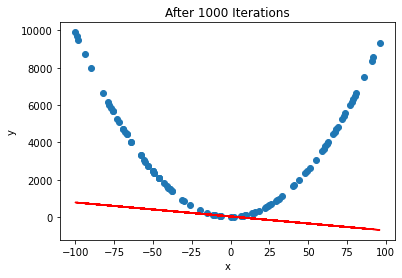

In [5]:
def model_misfit(w=0, bias=0, eta=0.00001, iteration_time=1000, alpha=1, beta=1, b=0):
    # GENERATE DATA POINTS
    data_x, data_y = quadratic_generator(alpha=alpha, beta=beta, bias=b)

    # FIT THE MODEL
    for i in range(iteration_time):
        w, bias = update(data_x, data_y, w, bias, eta)

    # MAKE PREDICTIONS
    pred = []
    for xi in data_x:
        pred.append(w * xi + bias)

    # PLOT THE FINAL RESULT
    plt.figure()
    plt.title("After 1000 Iterations")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(data_x, data_y)
    plt.plot(data_x, pred, c="r")
    plt.show()
model_misfit()

# the effects of different outlier rate

In [7]:
# DATA POINTS WITH OUTLIERS
def sample_with_outliers(point_number=100, w=1, b=1, outlier_rate=0.05):
    x = numpy.random.randint(-100, 100, point_number)
    outlier_number = int(point_number*outlier_rate)
    y = []

    # INLIERS
    for i in range(len(x)-outlier_number):
        y.append(w*x[i]+b)

    # OUTLIERS
    for i in range(outlier_number):
        y.append(numpy.random.randint(-100, 100))
    return x, y

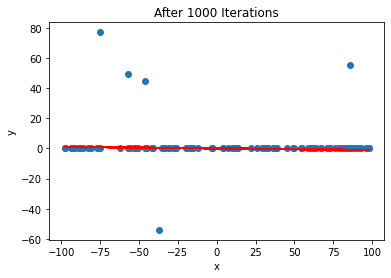

In [12]:
def model_outliers(w=0, bias=0, eta=0.00001, point_number=100, outlier_rate=0.05, iteration_time=1000):
    # GENERATE DATA POINTS
    data_x, data_y = sample_with_outliers(point_number=point_number, w=w, b=bias, outlier_rate=outlier_rate)

    # FIT THE MODEL
    for i in range(iteration_time):
        w, bias = update(data_x, data_y, w, bias, eta)

    # MAKE PREDICTIONS
    pred = []
    for xi in data_x:
        pred.append(w * xi + bias)

    # PLOT THE FINAL RESULT
    plt.figure()
    plt.title("After 1000 Iterations")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(data_x, data_y)
    plt.plot(data_x, pred, c="r")
    plt.show()
model_outliers()